# `Xarray` 数据处理（１）
------------------------------

主讲人：李显祥

大气科学学院

## 1. DataArray

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#xr.set_options(display_style="html")
%matplotlib inline

In [2]:
xr.__version__  #show_versions()

'0.16.2'

一个简单的没有维度和坐标的 DataArray

In [3]:
da = xr.DataArray([9, 0, 2, 1, 0])
da

<xarray.DataArray (dim_0: 5)>
array([9, 0, 2, 1, 0])
Dimensions without coordinates: dim_0

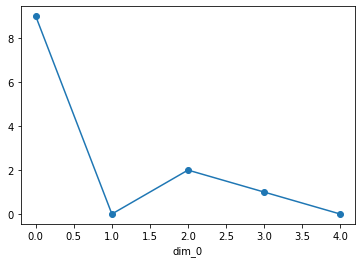

In [4]:
da.plot(marker='o')

加上维度名字

In [5]:
da = xr.DataArray([9, 0, 2, 1, 0], dims=['x'])
da

<xarray.DataArray (x: 5)>
array([9, 0, 2, 1, 0])
Dimensions without coordinates: x

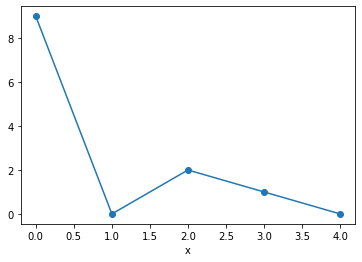

In [6]:
da.plot(marker='o')

如果加上坐标，情况会如何呢？

In [7]:
import pandas as pd
da = xr.DataArray([9, 0, 2, 1, 0],
                  dims=['year'],
                  coords={'year':pd.to_datetime(['2010','2011','2012','2013','2014'])})
da

<xarray.DataArray (year: 5)>
array([9, 0, 2, 1, 0])
Coordinates:
  * year     (year) datetime64[ns] 2010-01-01 2011-01-01 ... 2014-01-01

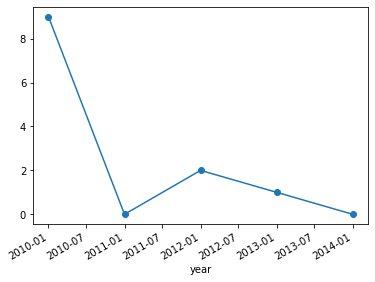

In [8]:
f,ax = plt.subplots()
da.plot(ax=ax,marker='o')

### 多维 DataArray

In [9]:
S = [[1,2,4],[5,6,7]]
levels = [0,1]
date = pd.to_datetime(['2015-09-01','2015-10-01','2015-11-01'])

da = xr.DataArray(S, dims=['level', 'date'],
                           coords={'level': levels,
                                   'date': date},
                 name='da')
da

<xarray.DataArray 'da' (level: 2, date: 3)>
array([[1, 2, 4],
       [5, 6, 7]])
Coordinates:
  * level    (level) int64 0 1
  * date     (date) datetime64[ns] 2015-09-01 2015-10-01 2015-11-01

`dataarray`和`dataset`可以转换为`pandas.dataframe`。

In [10]:
da.to_dataframe()

da
level date          
0     2015-09-01   1
      2015-10-01   2
      2015-11-01   4
1     2015-09-01   5
      2015-10-01   6
      2015-11-01   7

In [11]:
#air_temp = xr.tutorial.load_dataset('air_temperature')
air_temp = xr.open_dataset('air_temperature.nc')

In [12]:
air_temp.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
[3869000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

## 2. DataSet

In [13]:
air_temp

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

### 坐标 vs. 变量

In [14]:
air_temp*100

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 2.412e+04 2.425e+04 ... 2.957e+04
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

操作是针对数据变量的，坐标本身不变。

如果要改变坐标，需要用 `.assign_coords` 方法：

In [15]:
air_temp_new = air_temp.assign_coords({'lon':(((air_temp.lon+180)%360)-180)})
# 或者
# air_temp_new = air_temp.assign_coords(lon = (((air_temp.lon+180)%360)-180))
air_temp_new

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 -160.0 -157.5 -155.0 -152.5 ... -35.0 -32.5 -30.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

## 3. 数组访问方法

In [16]:
air_temp.air[0,0,0]
# 等同于　
#air_temp.air.isel(lat=0,lon=0,time=0)

<xarray.DataArray 'air' ()>
array(241.2, dtype=float32)
Coordinates:
    lat      float32 75.0
    lon      float32 200.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [17]:
air_temp.air.sel(lat=50,lon=300,time='2013-12-01T00:00:00')

<xarray.DataArray 'air' ()>
array(265.4, dtype=float32)
Coordinates:
    lat      float32 50.0
    lon      float32 300.0
    time     datetime64[ns] 2013-12-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [18]:
# slice 选取坐标范围
air_temp.air.sel(lat=50,lon=300,time=slice('2013-12-01T00:00:00','2013-12-02T00:00:00'))

<xarray.DataArray 'air' (time: 5)>
array([265.4    , 267.79   , 268.19998, 269.6    , 268.79   ], dtype=float32)
Coordinates:
    lat      float32 50.0
    lon      float32 300.0
  * time     (time) datetime64[ns] 2013-12-01 2013-12-01T06:00:00 ... 2013-12-02
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [19]:
air_temp.air.sel(lat=73,lon=300,time='2013-12-02T00:00:00',method='nearest')

<xarray.DataArray 'air' ()>
array(259.69998, dtype=float32)
Coordinates:
    lat      float32 72.5
    lon      float32 300.0
    time     datetime64[ns] 2013-12-02
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

`method` 参数的选项: 
* `None` (default): only exact matches
* `pad` / `ffill`: propagate last valid index value forward
* `backfill` / `bfill`: propagate next valid index value backward
* `nearest`: use nearest valid index value

`.sel` 对整个数据集也可以使用, 注意数据中 `lat` 是倒序的

In [20]:
# 
air_temp.sel(lat=slice(75,50),lon=300,time='2013-12-02T00:00:00')

<xarray.Dataset>
Dimensions:  (lat: 11)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 60.0 57.5 55.0 52.5 50.0
    lon      float32 300.0
    time     datetime64[ns] 2013-12-02
Data variables:
    air      (lat) float32 253.8 259.7 254.4 253.1 ... 262.3 258.3 259.2 268.8
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

## 4. 简单绘图

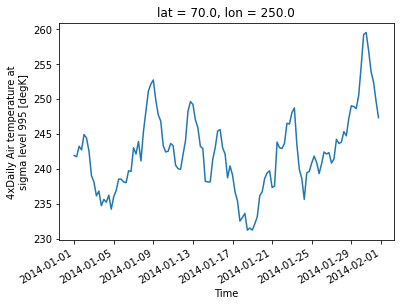

In [21]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

air_temp.air.sel(lat=70,lon=250,time='2014-01').plot()

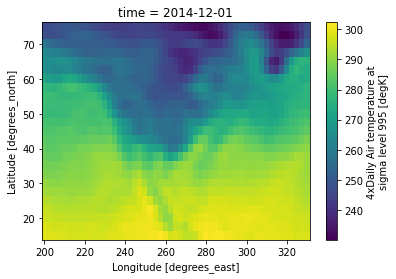

In [22]:
air_temp.air.sel(time='2014-12-01T00:00:00').plot()

## 5. 基本算术运算

In [23]:
air_temp + 20.0

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 261.2 262.5 263.5 ... 316.5 316.2 315.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [24]:
air_temp * 1.1

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 265.3 266.8 267.9 ... 326.1 325.8 325.3
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [25]:
np.sin(air_temp)

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 0.6462 -0.5625 -0.9996 ... 0.7709 0.3712
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

## 6. 聚合运算

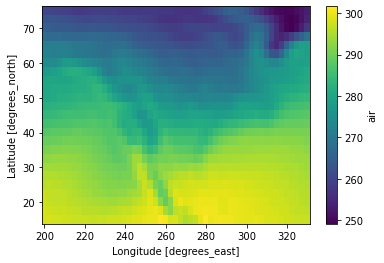

In [26]:
air_temp.air.mean(dim='time').plot()

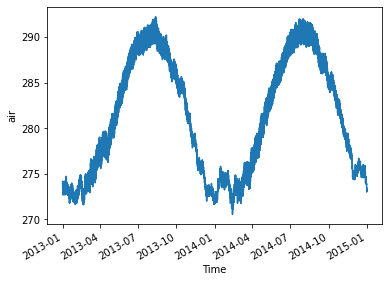

In [27]:
air_temp.air.mean(dim=['lat','lon']).plot() 

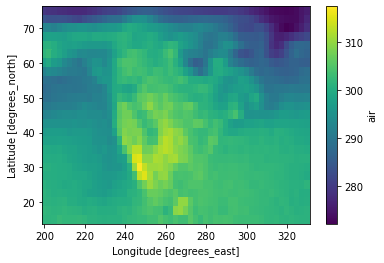

In [28]:
air_temp.air.max(dim='time').plot()

In [29]:
anomaly = air_temp.air - air_temp.air.mean(dim='time')

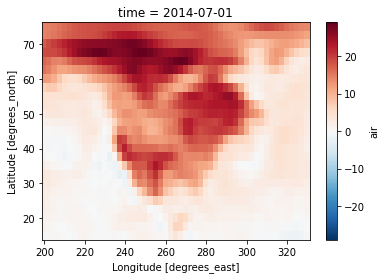

In [30]:
anomaly.sel(time='2014-07-01T00:00:00').plot()

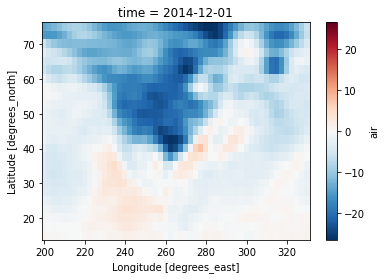

In [31]:
anomaly.sel(time='2014-12-01T00:00:00').plot()

In [32]:
anomaly

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[-1.91756439e+01, -1.76825867e+01, -1.63859253e+01, ...,
         -1.80151215e+01, -1.64373322e+01, -1.48374176e+01],
        [-1.89337158e+01, -1.82936096e+01, -1.80489044e+01, ...,
         -1.69549713e+01, -1.62852173e+01, -1.50585022e+01],
        [-1.47680969e+01, -1.45270996e+01, -1.51714020e+01, ...,
         -1.74070740e+01, -1.71924744e+01, -1.60147552e+01],
        ...,
        [-1.04931641e+00, -7.52960205e-01, -2.29125977e-01, ...,
         -1.41033936e+00, -1.18792725e+00, -1.11624146e+00],
        [-2.22869873e+00, -1.73648071e+00, -6.80053711e-01, ...,
         -9.59106445e-01, -8.76861572e-01, -1.24349976e+00],
        [-2.07592773e+00, -1.59591675e+00, -1.01385498e+00, ...,
         -4.37774658e-01, -4.91027832e-01, -7.05017090e-01]],

       [[-1.82756500e+01, -1.74825897e+01, -1.67859344e+01, ...,
         -1.88151093e+01, -1.83373413e+01, -1.76374207e+01],
        [-1.91337128e+01, -1.86936188e+01, -1.85489044e+01, ...,
         -1.87549591e+01, -1.90852051e+01, -1.86584930e+01],
        [-1.15681000e+01, -1.14370880e+01, -1.19614105e+01, ...,
         -1.98070831e+01, -2.01924744e+01, -1.92147522e+01],
...
         -1.72033691e+00, -1.59793091e+00, -1.52621460e+00],
        [-1.83868408e+00, -7.46459961e-01,  1.19934082e-01, ...,
         -1.56909180e+00, -1.68685913e+00, -2.05349731e+00],
        [-5.75927734e-01,  4.05883789e-03,  3.76129150e-01, ...,
         -1.64776611e+00, -1.79104614e+00, -2.11502075e+00]],

       [[-1.52856445e+01, -1.58925934e+01, -1.65959320e+01, ...,
         -9.12512207e+00, -1.04473419e+01, -1.16474152e+01],
        [-1.28437042e+01, -1.35036163e+01, -1.43589020e+01, ...,
         -1.01649628e+01, -1.12952118e+01, -1.26685028e+01],
        [-1.77810669e+00, -2.13708496e+00, -2.67141724e+00, ...,
         -1.07170715e+01, -1.09924774e+01, -1.14247589e+01],
        ...,
        [-3.85931396e+00, -3.26293945e+00, -1.53912354e+00, ...,
         -1.52032471e+00, -1.19793701e+00, -1.12622070e+00],
        [-2.03869629e+00, -1.04647827e+00, -2.80059814e-01, ...,
         -1.16909790e+00, -1.08685303e+00, -1.25347900e+00],
        [-6.75933838e-01, -2.95928955e-01, -2.38647461e-02, ...,
         -8.47778320e-01, -1.09103394e+00, -1.61502075e+00]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00